In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [201]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\taxpayer_data.csv")

In [202]:
df

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0,High
996,997,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,844610.21,0.51,9,0,High
997,998,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,668627.79,1.43,0,0,Medium
998,999,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0,High


# Problem Statement: Analyzing Taxpayer Compliance and Financial Risk Factors
- In this project, we are going to analyze the financial and compliance behavior of taxpayers from different industries. The dataset gives us information about how much revenue a taxpayer earns, how much they spend, their tax obligations, and whether they have violated any rules like paying taxes late or having errors in their reports.

**Goals:**
- Identify trends: We want to find out how taxpayers are performing financially and how well they are following tax rules.
- Understand the relationship between money: We will see how Revenue (income), Expenses (costs), and Profit (remaining money) are connected.
- Evaluate Tax Compliance: We will check how well taxpayers are paying their taxes (Tax Compliance Ratio) and see how it changes across different industries.
- Understand Risk Levels: We want to find out what factors (like late filings or violations) lead to taxpayers being labeled as High, Medium, or Low Risk.
- Look at Late Filings & Violations: We’ll see how often taxpayers file their taxes late or violate rules and explore what’s happening in these cases.
- Audit Findings and Risk: We’ll check if there’s a connection between audit findings (errors or issues found during audits) and the risk levels assigned to taxpayers.


**Expected Outcomes**:
- We will know which industries have the highest risk of financial problems or tax rule violations.
- We will understand the patterns in how taxpayers behave (like how profitable they are and how well they follow tax rules).
- We will provide suggestions to improve tax compliance and reduce financial risk for taxpayers.


In [203]:
df.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0,Low


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            1000 non-null   int64  
 1   Revenue                1000 non-null   float64
 2   Expenses               1000 non-null   float64
 3   Tax_Liability          1000 non-null   float64
 4   Tax_Paid               1000 non-null   float64
 5   Late_Filings           1000 non-null   int64  
 6   Compliance_Violations  1000 non-null   int64  
 7   Industry               1000 non-null   object 
 8   Profit                 1000 non-null   float64
 9   Tax_Compliance_Ratio   1000 non-null   float64
 10  Audit_Findings         1000 non-null   int64  
 11  Audit_to_Tax_Ratio     1000 non-null   int64  
 12  Risk_Label             1000 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 101.7+ KB


In [205]:
df.dtypes

Taxpayer_ID                int64
Revenue                  float64
Expenses                 float64
Tax_Liability            float64
Tax_Paid                 float64
Late_Filings               int64
Compliance_Violations      int64
Industry                  object
Profit                   float64
Tax_Compliance_Ratio     float64
Audit_Findings             int64
Audit_to_Tax_Ratio         int64
Risk_Label                object
dtype: object

In [206]:
df.duplicated().sum()

0

In [207]:
df.isnull().sum()

Taxpayer_ID              0
Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64

In [208]:
df.drop(columns=["Taxpayer_ID"], inplace=True)


In [209]:
df

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0,High
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0,Medium
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0,High
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0,High
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
995,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0,High
996,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,844610.21,0.51,9,0,High
997,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,668627.79,1.43,0,0,Medium
998,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0,High


In [210]:
df.dtypes

Revenue                  float64
Expenses                 float64
Tax_Liability            float64
Tax_Paid                 float64
Late_Filings               int64
Compliance_Violations      int64
Industry                  object
Profit                   float64
Tax_Compliance_Ratio     float64
Audit_Findings             int64
Audit_to_Tax_Ratio         int64
Risk_Label                object
dtype: object

In [211]:
continous = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Profit', 'Tax_Compliance_Ratio', 'Audit_to_Tax_Ratio']

discrete_categorical = ['Industry','Risk_Label']

discrete_count = ['Late_Filings',
       'Compliance_Violations', 'Audit_Findings']

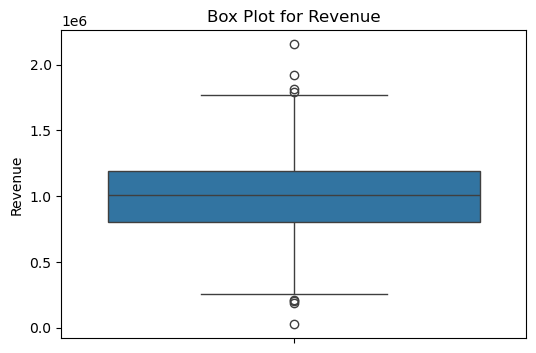

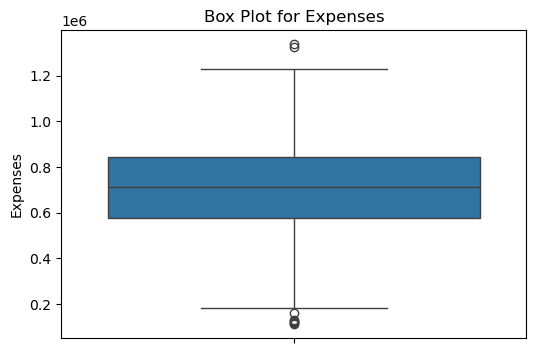

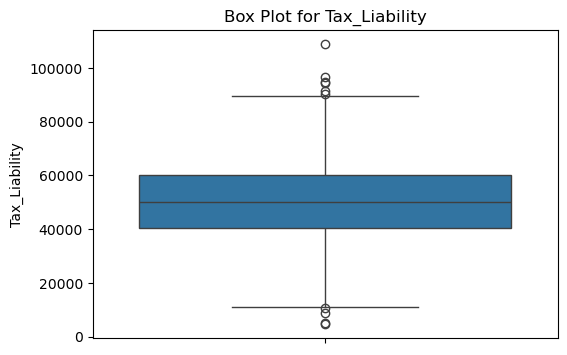

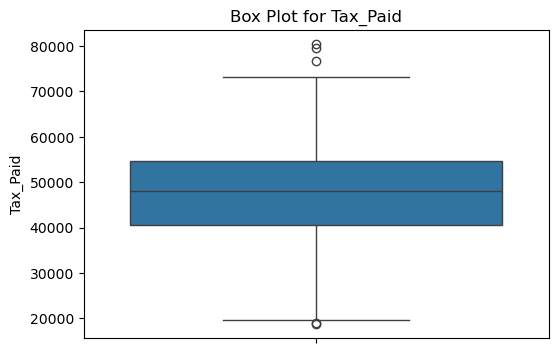

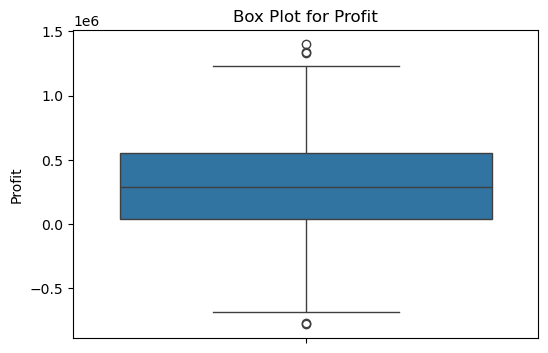

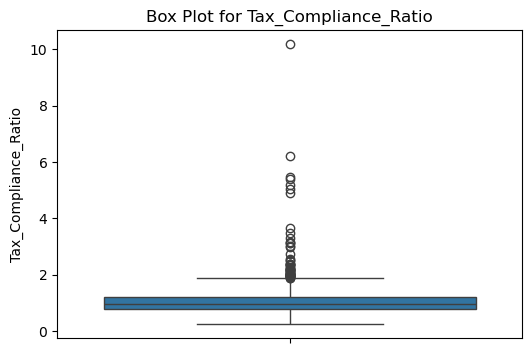

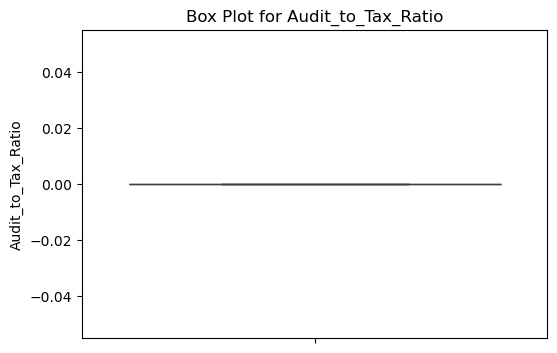

In [212]:
# checking outliers
for column in continous:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [213]:
print(df[continous].skew())

Revenue                 0.116976
Expenses               -0.049396
Tax_Liability           0.061247
Tax_Paid               -0.002121
Profit                  0.031541
Tax_Compliance_Ratio    5.834610
Audit_to_Tax_Ratio      0.000000
dtype: float64


In [214]:
# Calculate IQR for each continuous column
Q1 = df[continous].quantile(0.25)
Q3 = df[continous].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
print("==================")
print(Q1)
print("==================")
print(IQR)
# Identify outliers
outliers_iqr = ((df[continous] < (Q1 - 1.5 * IQR)) | (df[continous] > (Q3 + 1.5 * IQR)))

# Display rows with outliers
outlier_data_iqr = df[outliers_iqr.any(axis=1)]
outlier_data_iqr



Revenue                 1.194383e+06
Expenses                8.457764e+05
Tax_Liability           5.991373e+04
Tax_Paid                5.466946e+04
Profit                  5.514364e+05
Tax_Compliance_Ratio    1.210000e+00
Audit_to_Tax_Ratio      0.000000e+00
Name: 0.75, dtype: float64
Revenue                 805722.9050
Expenses                578751.6650
Tax_Liability            40280.0025
Tax_Paid                 40625.7975
Profit                   41004.4225
Tax_Compliance_Ratio         0.7675
Audit_to_Tax_Ratio           0.0000
Name: 0.25, dtype: float64
Revenue                 388660.2575
Expenses                267024.7725
Tax_Liability            19633.7300
Tax_Paid                 14043.6575
Profit                  510431.9400
Tax_Compliance_Ratio         0.4425
Audit_to_Tax_Ratio           0.0000
dtype: float64


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0,Low
23,572575.54,1128454.07,30367.69,59539.01,0,0,Retail,-555878.53,1.96,5,0,Low
24,836685.18,1045508.63,4707.32,29302.58,3,2,Manufacturing,-208823.45,6.22,0,0,High
35,633746.91,1014797.35,91394.90,52468.73,2,0,Healthcare,-381050.44,0.57,6,0,High
39,1059058.37,909419.66,23463.86,45933.89,4,1,Retail,149638.71,1.96,8,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...
970,1038431.32,818711.34,21316.18,44028.05,4,2,Healthcare,219719.98,2.07,9,0,High
971,795684.50,111922.27,48970.49,36977.30,2,2,Manufacturing,683762.23,0.76,1,0,High
982,709907.16,574656.56,60987.38,79520.57,3,2,Retail,135250.60,1.30,2,0,High
984,998919.24,890625.01,25176.69,50428.82,3,0,Retail,108294.23,2.00,6,0,High


In [215]:
df[continous].describe()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Profit,Tax_Compliance_Ratio,Audit_to_Tax_Ratio
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.0
mean,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.916324e+05,1.077180,0.0
std,2.937648e+05,1.994909e+05,14751.814482,10271.325437,3.617036e+05,0.617086,0.0
min,2.761980e+04,1.119223e+05,4707.320000,18705.510000,-7.801314e+05,0.240000,0.0
25%,8.057229e+05,5.787517e+05,40280.002500,40625.797500,4.100442e+04,0.767500,0.0
50%,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.856810e+05,0.970000,0.0
75%,1.194383e+06,8.457764e+05,59913.732500,54669.455000,5.514364e+05,1.210000,0.0
max,2.155819e+06,1.338622e+06,108893.570000,80430.930000,1.401163e+06,10.190000,0.0


In [216]:
df[continous].isnull().sum()

Revenue                 0
Expenses                0
Tax_Liability           0
Tax_Paid                0
Profit                  0
Tax_Compliance_Ratio    0
Audit_to_Tax_Ratio      0
dtype: int64

# Validate Calculations
- Ensure that all derived columns in the dataset are accurately calculated.

**Profit Validation:**

- Formula: Profit=Revenue−Expenses

In [217]:


# Recalculate Profit
df['Calculated_Profit'] = df['Revenue'] - df['Expenses']

# Check for mismatches (True if mismatched, False if matched)
mismatch = df['Profit'] != df['Calculated_Profit']

# Count the number of mismatches
num_mismatches = mismatch.sum()

# Display the number of mismatches
print(f"Number of mismatches: {num_mismatches}")

# If you want to see the rows with mismatches
mismatched_rows = df[mismatch]
print("Rows with mismatches:")
mismatched_rows


Number of mismatches: 668
Rows with mismatches:


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Calculated_Profit
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0,High,169143.16
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0,Medium,73593.97
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0,High,482380.49
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0,Low,90109.33
5,929758.91,778697.08,53199.41,34645.18,0,2,Manufacturing,151061.83,0.65,8,0,High,151061.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,795404.73,841660.77,46816.87,55510.99,3,2,Healthcare,-46256.04,1.19,7,0,High,-46256.04
994,699514.00,770289.64,35721.22,27349.17,4,2,Finance,-70775.64,0.77,2,0,High,-70775.64
995,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0,High,1639.86
998,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0,High,161259.69


In [218]:

# Recalculate Profit
df['Calculated_Profit'] = df['Revenue'] - df['Expenses']

# Check for mismatches (True if mismatched, False if matched)
mismatch = df['Profit'] != df['Calculated_Profit']

# Count the number of mismatches
num_mismatches = mismatch.sum()

# Print the result
print(f"Number of mismatches: {num_mismatches}")


Number of mismatches: 668


In [219]:
# Drop the Profit column:
df.drop(columns=['Profit'], inplace=True)

In [220]:
# Rename 'Calculated_Profit' to 'Profit'
df.rename(columns={'Calculated_Profit': 'Profit'}, inplace=True)

df

**Tax_Compliance_Ratio Validation:**

Formula: 
Tax Compliance Ratio= Tax Paid/Tax Liability

 
Recalculate the ratio for each row. Highlight values that are significantly off or invalid (e.g., division by zero).


In [221]:
# Recalculate the Tax Compliance Ratio
df['Calculated_Tax_Compliance_Ratio'] = df['Tax_Paid'] / df['Tax_Liability']
df.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0.73,0,0,High,169143.16,0.725363
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0.82,0,0,Medium,73593.97,0.823632
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,1.15,3,0,High,482380.49,1.150871
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1.47,1,0,High,886296.32,1.473689
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2.48,2,0,Low,90109.33,2.480370


In [222]:

# Handle division by zero (replace with NaN or another value if needed)
df['Calculated_Tax_Compliance_Ratio'] = df['Calculated_Tax_Compliance_Ratio'].replace([float('inf'), -float('inf')], float('nan'))





In [223]:
# Highlight invalid values (e.g., very high or low values, or NaN)# Display rows with invalid Tax Compliance Ratios
invalid_values = df[df['Calculated_Tax_Compliance_Ratio'].isna() | (df['Calculated_Tax_Compliance_Ratio'] > 10) | (df['Calculated_Tax_Compliance_Ratio'] < 0.1)]

invalid_values

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
947,792427.58,694147.44,5132.96,52281.86,3,2,Retail,10.19,6,0,High,98280.14,10.185519


In [224]:
# Optionally, check how many invalid values there are
invalid_count = invalid_values.shape[0]
invalid_count

1

**Observation**:
- Possible Reasons for High Tax Compliance Ratio:
Overpayment of Taxes: The company might have overpaid taxes, which could be due to tax prepayments, estimated payments, or penalties.
Errors in Data: There might be an error in data reporting, where Tax_Liability was underreported, or Tax_Paid was overreported.

In [225]:
df = df.drop(columns=['Tax_Compliance_Ratio'])

In [226]:
df.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0,0,High,169143.16,0.725363
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0,0,Medium,73593.97,0.823632
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,3,0,High,482380.49,1.150871
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1,0,High,886296.32,1.473689
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2,0,Low,90109.33,2.480370


In [227]:
# Recalculate the Audit to Tax Ratio
df['Calculated_Audit_to_Tax_Ratio'] = df['Audit_Findings'] / df['Tax_Liability']

In [228]:
# Compare the recalculated ratio with the existing column
df['Audit_to_Tax_Ratio_Mismatch'] = df['Audit_to_Tax_Ratio'] != df['Calculated_Audit_to_Tax_Ratio']
df.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio,Calculated_Audit_to_Tax_Ratio,Audit_to_Tax_Ratio_Mismatch
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0,0,High,169143.16,0.725363,0.000000,False
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0,0,Medium,73593.97,0.823632,0.000000,False
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,3,0,High,482380.49,1.150871,0.000079,True
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1,0,High,886296.32,1.473689,0.000022,True
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2,0,Low,90109.33,2.480370,0.000093,True


In [229]:
# Count the number of mismatches
num_mismatches = df['Audit_to_Tax_Ratio_Mismatch'].sum()
num_mismatches 

881

In [230]:
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int64
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
Calculated_Audit_to_Tax_Ratio      float64
Audit_to_Tax_Ratio_Mismatch           bool
dtype: object

In [231]:
# Convert the calculated audit to tax ratio to integer (round to nearest integer)
df['Calculated_Audit_to_Tax_Ratio_Int'] = df['Calculated_Audit_to_Tax_Ratio'].astype(int)

# Compare both columns (Audit_to_Tax_Ratio vs. Calculated_Audit_to_Tax_Ratio_Int)
df['Audit_to_Tax_Ratio_Same'] = df['Audit_to_Tax_Ratio'] == df['Calculated_Audit_to_Tax_Ratio_Int']

# Count the number of rows where the values are the same
num_same = df['Audit_to_Tax_Ratio_Same'].sum()
num_same


1000

In [232]:
df.dtypes

Revenue                              float64
Expenses                             float64
Tax_Liability                        float64
Tax_Paid                             float64
Late_Filings                           int64
Compliance_Violations                  int64
Industry                              object
Audit_Findings                         int64
Audit_to_Tax_Ratio                     int64
Risk_Label                            object
Profit                               float64
Calculated_Tax_Compliance_Ratio      float64
Calculated_Audit_to_Tax_Ratio        float64
Audit_to_Tax_Ratio_Mismatch             bool
Calculated_Audit_to_Tax_Ratio_Int      int32
Audit_to_Tax_Ratio_Same                 bool
dtype: object

In [233]:
df['Audit_to_Tax_Ratio'].unique()

array([0], dtype=int64)

In [234]:
df = df.drop(columns = ['Audit_to_Tax_Ratio_Mismatch', 'Calculated_Audit_to_Tax_Ratio', 'Audit_to_Tax_Ratio_Same', 'Calculated_Audit_to_Tax_Ratio_Int'])

In [235]:
df

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0,0,High,169143.16,0.725363
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0,0,Medium,73593.97,0.823632
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,3,0,High,482380.49,1.150871
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1,0,High,886296.32,1.473689
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2,0,Low,90109.33,2.480370
...,...,...,...,...,...,...,...,...,...,...,...,...
995,915669.91,914030.05,51162.21,48284.58,2,2,Finance,3,0,High,1639.86,0.943755
996,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,9,0,High,844610.21,0.505360
997,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,0,0,Medium,668627.79,1.427858
998,828646.30,667386.61,55012.65,64433.78,4,0,Tech,3,0,High,161259.69,1.171254


In [236]:
# Define the conditions for risk labels
def determine_risk_label(row):
    if row['Late_Filings'] > 2 or row['Compliance_Violations'] > 1:
        return 'High'
    elif row['Calculated_Tax_Compliance_Ratio'] >= 1 and row['Audit_to_Tax_Ratio'] < 1:
        return 'Medium'
    else:
        return 'Low'

# Create the Check_Label column based on the conditions
df['Check_Label'] = df.apply(determine_risk_label, axis=1)

# Compare the existing Risk_Label with the Check_Label
df['Risk_Label_Mismatch'] = df['Risk_Label'] != df['Check_Label']

# Count the mismatches
num_mismatches = df['Risk_Label_Mismatch'].sum()
print(f"Number of mismatches: {num_mismatches}")

# Replace Risk_Label with Check_Label for mismatched rows
df.loc[df['Risk_Label_Mismatch'], 'Risk_Label'] = df['Check_Label']

# Drop the temporary columns if no longer needed
df = df.drop(columns=['Check_Label', 'Risk_Label_Mismatch'])

# Display the updated DataFrame
df.head()


Number of mismatches: 295


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0,0,Low,169143.16,0.725363
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0,0,Low,73593.97,0.823632
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,3,0,High,482380.49,1.150871
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1,0,High,886296.32,1.473689
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2,0,Medium,90109.33,2.480370


# Analysis on Cleaned Data

In [237]:
df

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label,Profit,Calculated_Tax_Compliance_Ratio
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,0,0,Low,169143.16,0.725363
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,0,0,Low,73593.97,0.823632
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,3,0,High,482380.49,1.150871
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,1,0,High,886296.32,1.473689
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,2,0,Medium,90109.33,2.480370
...,...,...,...,...,...,...,...,...,...,...,...,...
995,915669.91,914030.05,51162.21,48284.58,2,2,Finance,3,0,High,1639.86,0.943755
996,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,9,0,Low,844610.21,0.505360
997,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,0,0,Medium,668627.79,1.427858
998,828646.30,667386.61,55012.65,64433.78,4,0,Tech,3,0,High,161259.69,1.171254


In [238]:
df.columns

Index(['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings',
       'Compliance_Violations', 'Industry', 'Audit_Findings',
       'Audit_to_Tax_Ratio', 'Risk_Label', 'Profit',
       'Calculated_Tax_Compliance_Ratio'],
      dtype='object')

In [239]:
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int64
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
dtype: object

In [240]:
df[['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Profit',
       'Calculated_Tax_Compliance_Ratio']].skew()

Revenue                            0.116976
Expenses                          -0.049396
Tax_Liability                      0.061247
Tax_Paid                          -0.002121
Profit                             0.031541
Calculated_Tax_Compliance_Ratio    5.832488
dtype: float64

In [241]:
df.isnull().sum()

Revenue                            0
Expenses                           0
Tax_Liability                      0
Tax_Paid                           0
Late_Filings                       0
Compliance_Violations              0
Industry                           0
Audit_Findings                     0
Audit_to_Tax_Ratio                 0
Risk_Label                         0
Profit                             0
Calculated_Tax_Compliance_Ratio    0
dtype: int64

#  Check Distribution of Key Variables

**histograms or density plots for continuous variables**

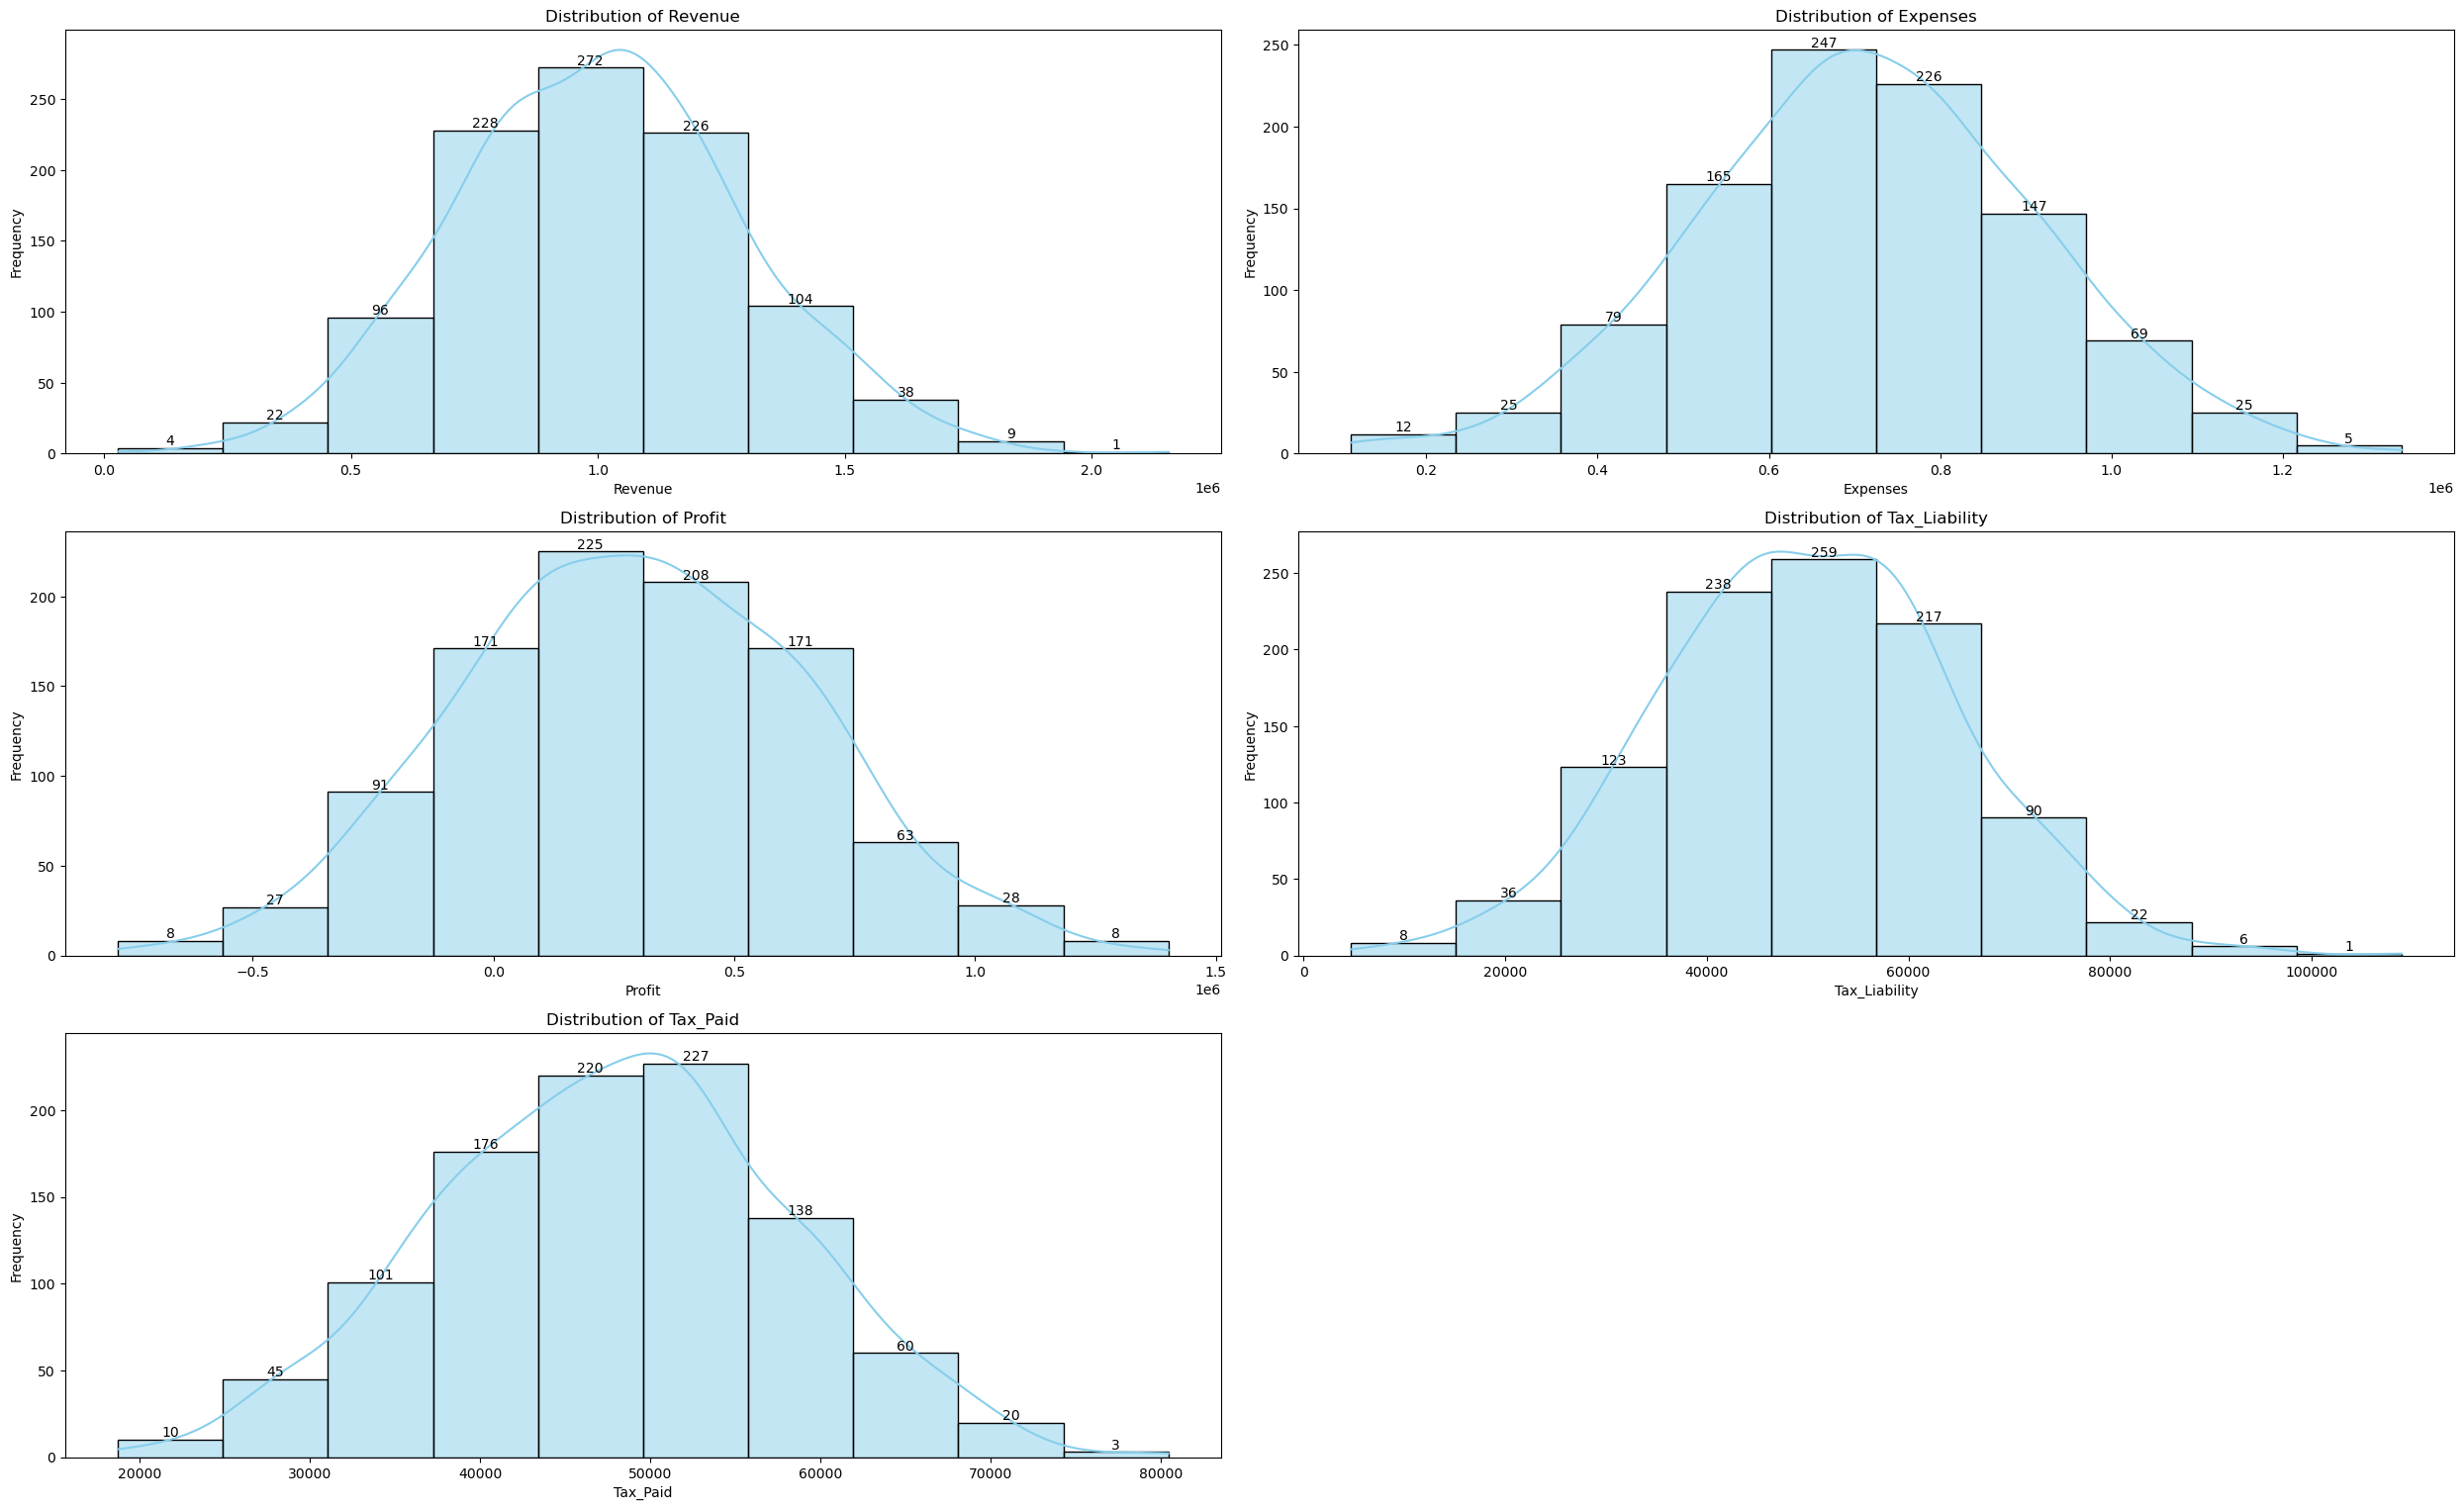

In [242]:
# List of continuous variables
col = ['Revenue', 'Expenses', 'Profit', 'Tax_Liability', 'Tax_Paid']

plt.figure(figsize=(25, 20))

j = 1
for i in col:
    plt.subplot(4, 2, j)
    
    # Plotting histogram for each variable
    d = sns.histplot(df[i], kde=True, bins=10, color='skyblue')
    
    if d.containers:  # Check if bar containers exist (to avoid errors with empty data)
        d.bar_label(d.containers[0])  # Add labels to bars
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    j += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**bar plots for discrete variables**

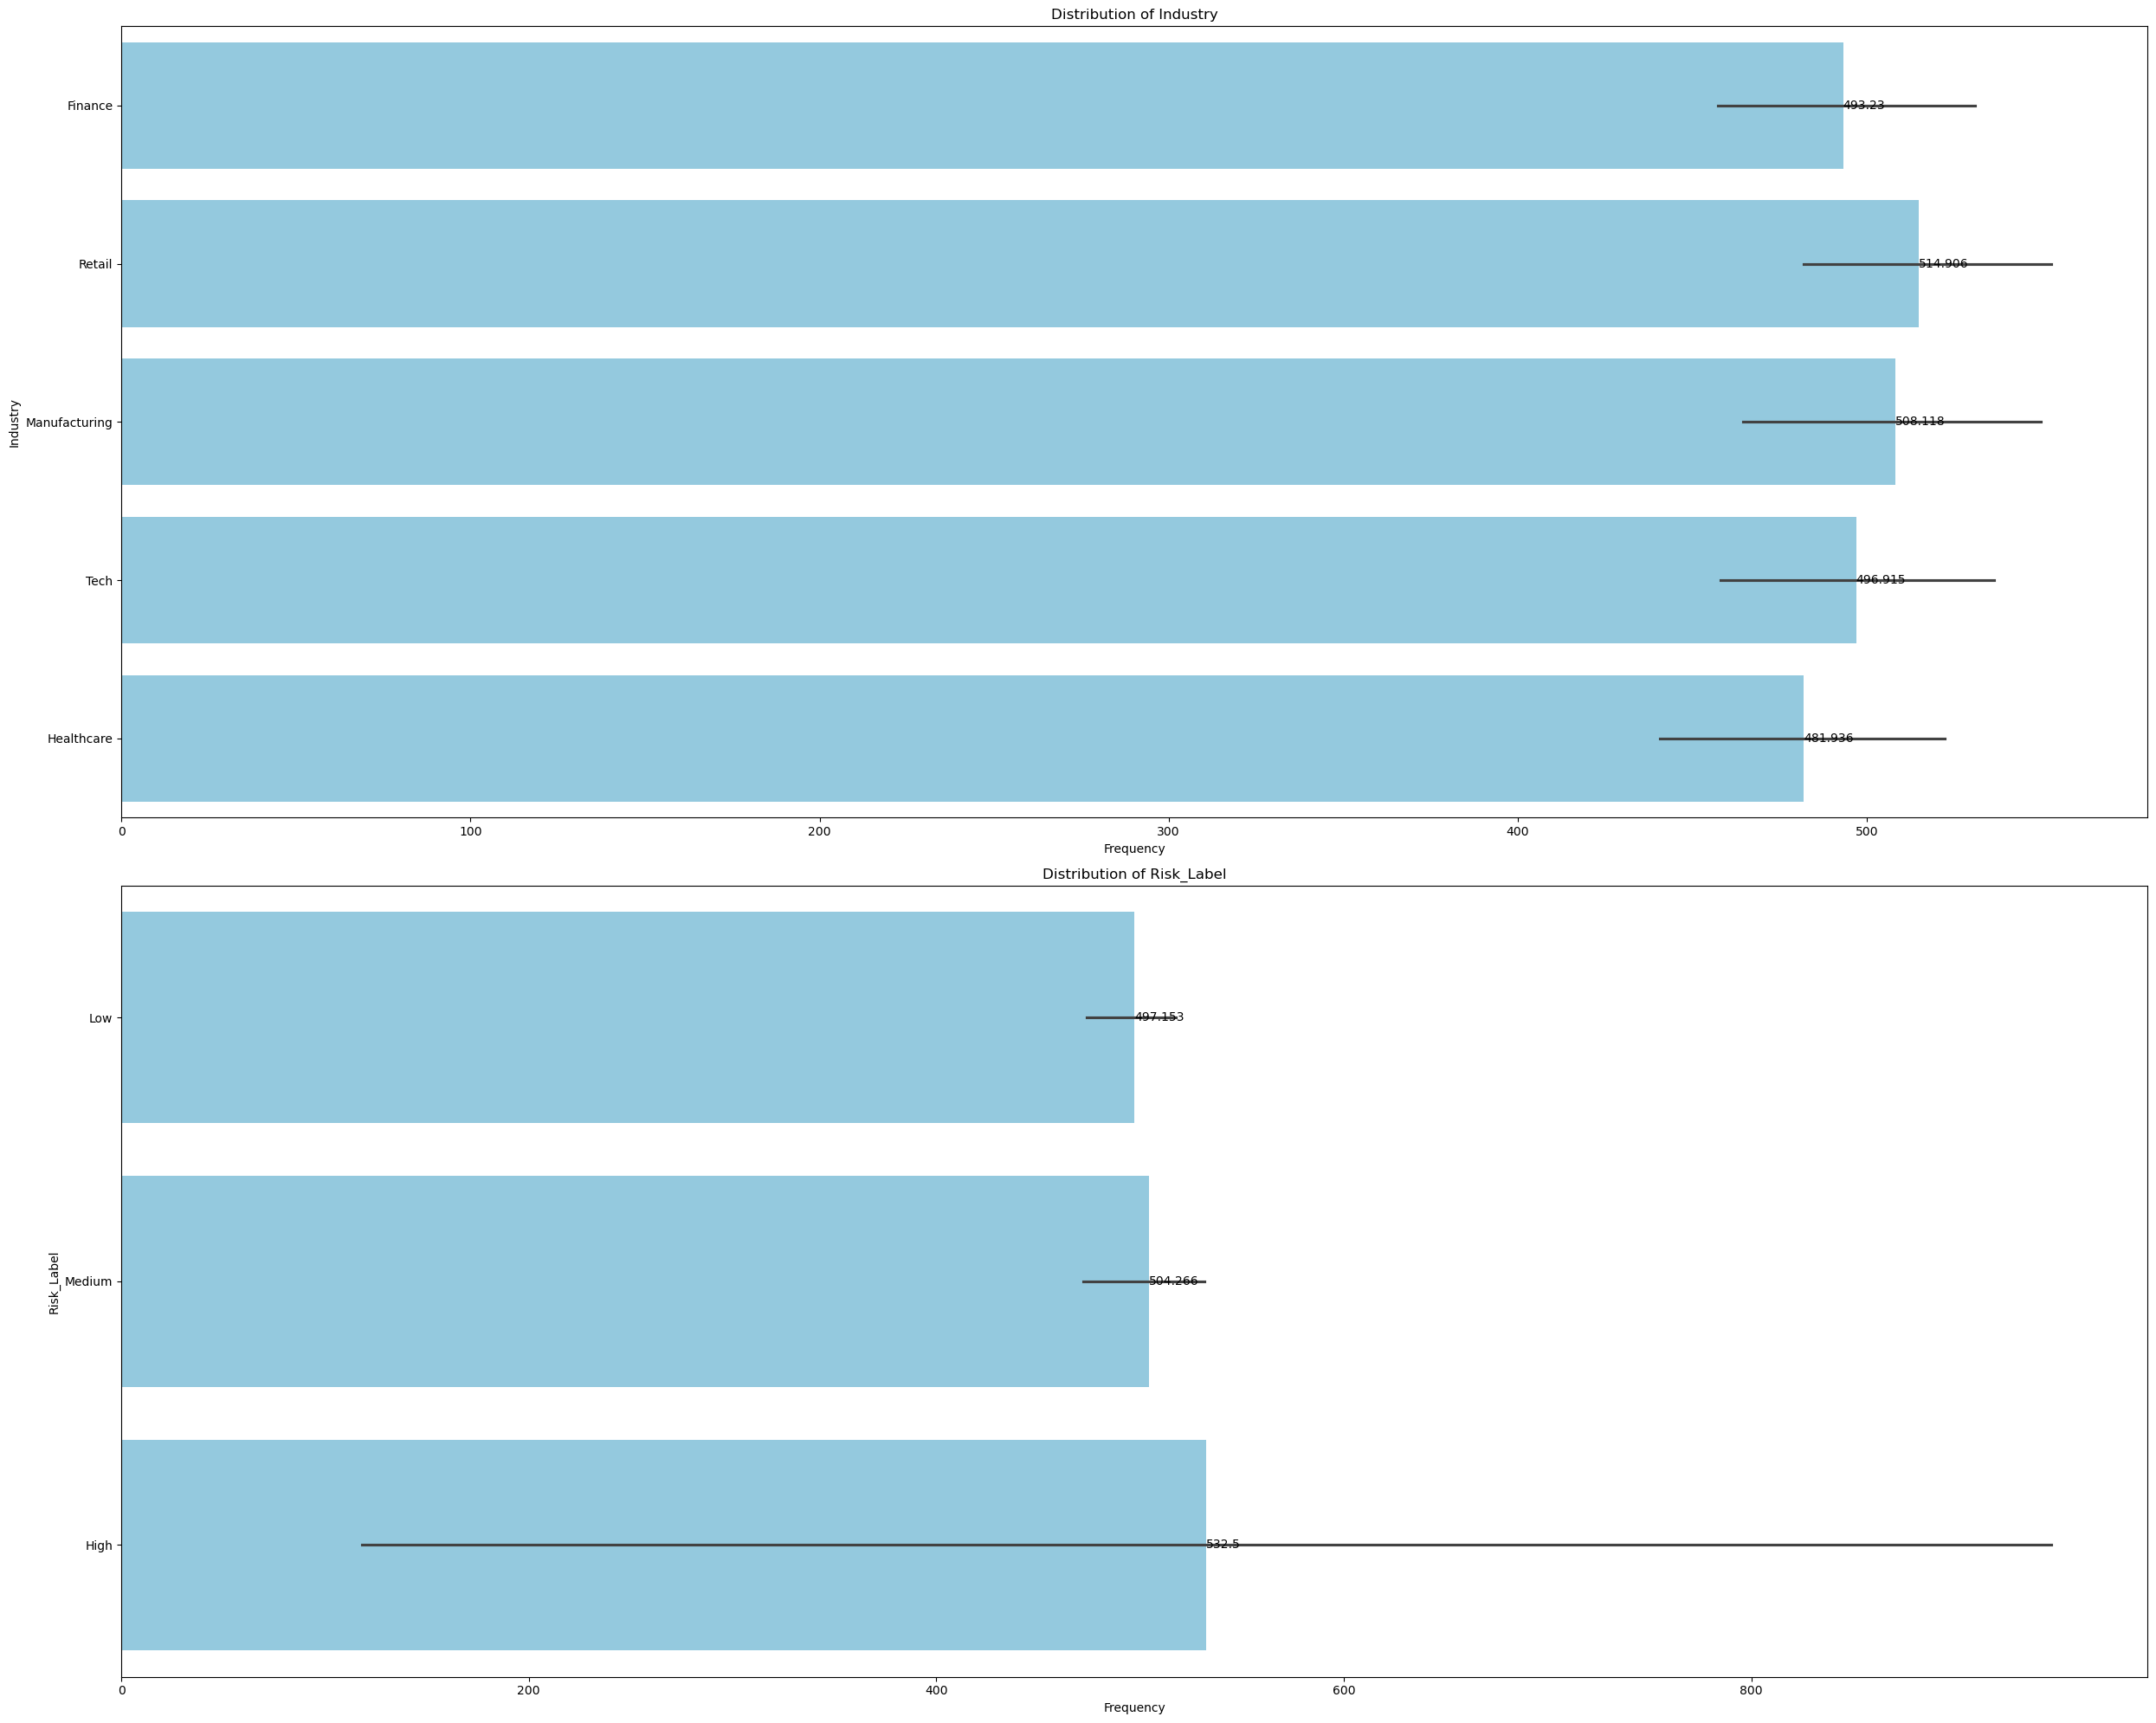

In [273]:
# List of continuous variables
col = ['Industry', 'Risk_Label']

plt.figure(figsize=(25, 20))

j = 1
for i in col:
    plt.subplot(2, 1, j)
    
    # Plotting histogram for each variable
    d = sns.barplot(df[i], color='skyblue')
    
    if d.containers:  # Check if bar containers exist (to avoid errors with empty data)
        d.bar_label(d.containers[0])  # Add labels to bars
    plt.title(f'Distribution of {i}')
    plt.ylabel(i)
    plt.xlabel('Frequency')
    j += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Check the correlation between continuous variables using a heatmap.**

In [244]:
continous = ['Revenue', 'Expenses', 'Profit', 'Tax_Liability', 'Tax_Paid', 'Profit', 'Calculated_Tax_Compliance_Ratio']

# Calculate correlation matrix
correlation_matrix = df[continous].corr()


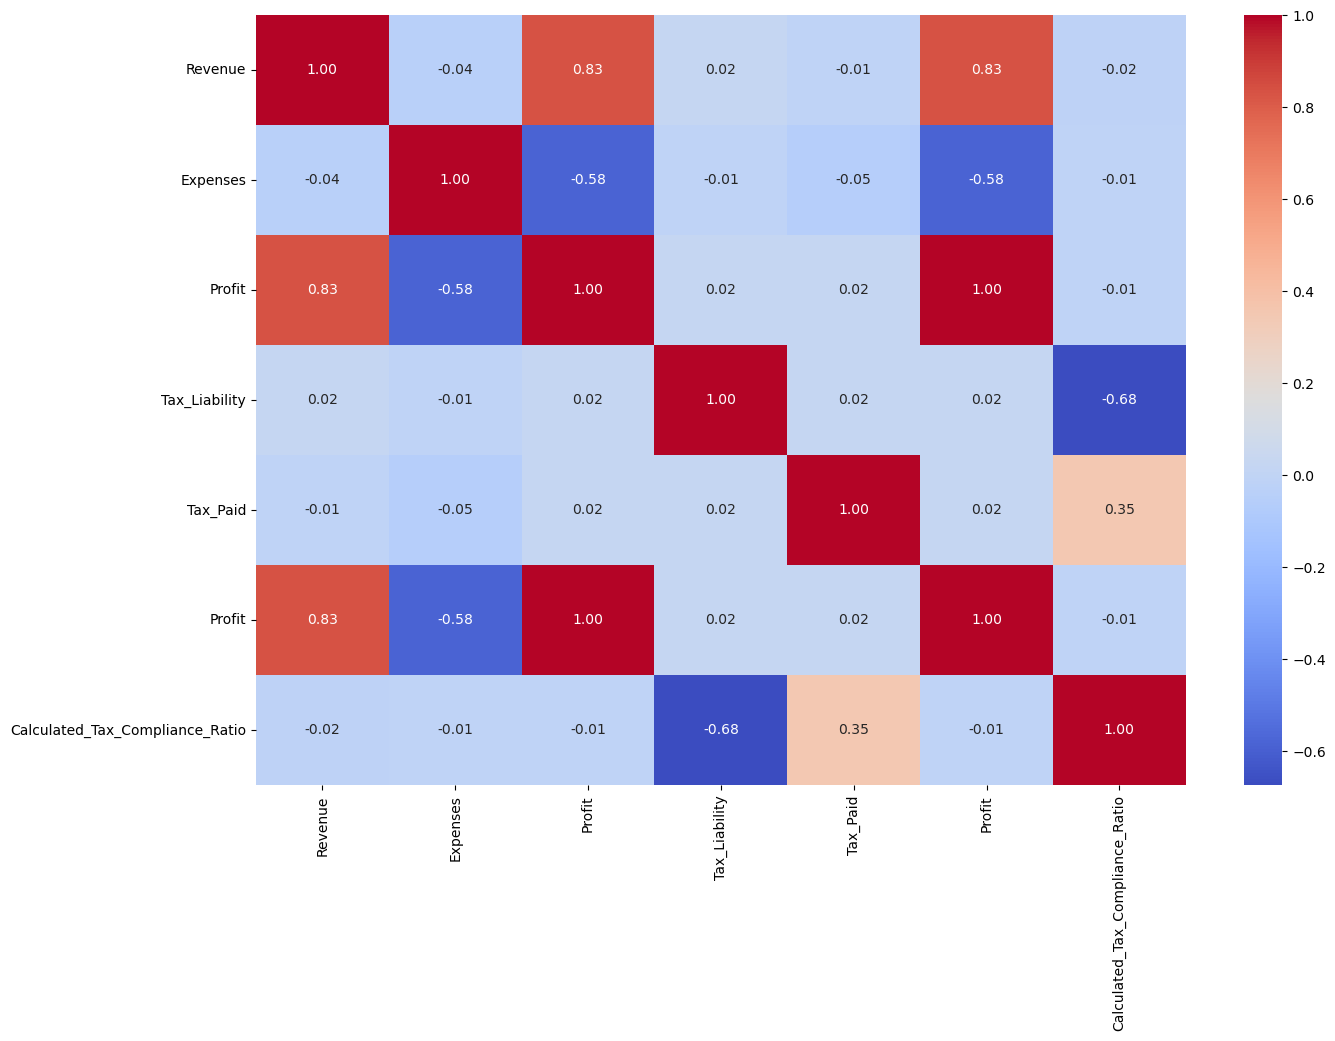

In [245]:

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Explore Taxpayer Compliance Behavior

In [246]:
df.columns

Index(['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings',
       'Compliance_Violations', 'Industry', 'Audit_Findings',
       'Audit_to_Tax_Ratio', 'Risk_Label', 'Profit',
       'Calculated_Tax_Compliance_Ratio'],
      dtype='object')

In [247]:
df['Audit_Findings']  = df['Audit_Findings'].astype(int)

In [248]:
# Which industries have the highest average number of late filings, and what might this indicate about their compliance behavior?

df_late_filings = df.groupby("Industry")['Late_Filings'].mean()

**Observation:**

Based on the average number of Late Filings by industry:

- Manufacturing has the highest average of 2.17 late filings, indicating that this  industry may face more compliance or reporting challenges compared to others.
- Finance follows closely with an average of 2.09 late filings, suggesting that despite being a heavily regulated sector, it still faces a significant number of late filings.
- Healthcare has an average of 2.02 late filings, which is slightly lower than Finance and Manufacturing but still suggests a notable level of non-compliance.
- Tech has an average of 1.97 late filings, which is lower than the top three but still shows that the industry struggles with timely compliance.
- Retail has the lowest average of 1.92 late filings, which could suggest relatively better compliance in terms of timely filings compared to other industries

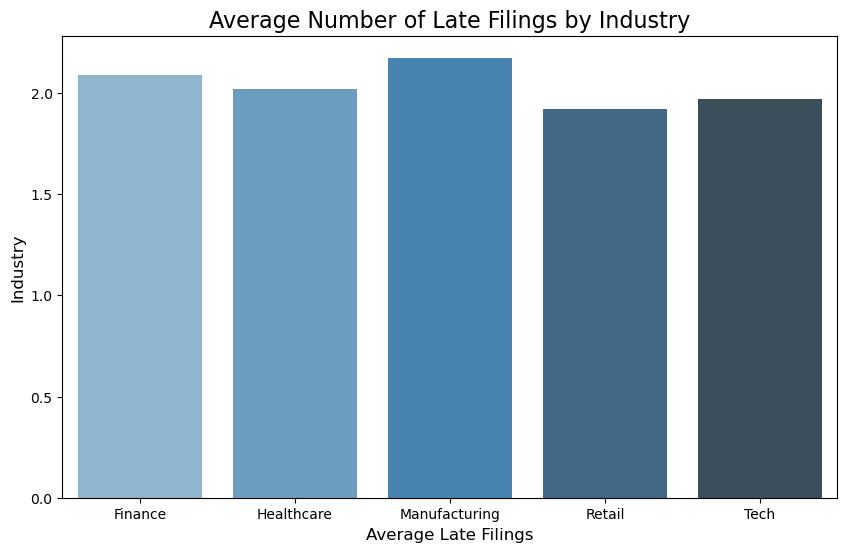

In [249]:
# Group the data by 'Industry' and calculate the mean of 'Late_Filings'
df_late_filings = df.groupby("Industry")['Late_Filings'].mean().reset_index()

# Plot the barplot
plt.figure(figsize=(10,6))
sns.barplot(y='Late_Filings', x='Industry', data=df_late_filings, palette='Blues_d')

# Adding labels and title
plt.title('Average Number of Late Filings by Industry', fontsize=16)
plt.xlabel('Average Late Filings', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Show the plot
plt.show()

In [250]:
# reset_index() converts the Series into a DataFrame, which makes it compatible with sns.barplot().
#Ensure that the data=df_late_filings is a DataFrame when using it in sns.barplot().
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int32
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
dtype: object

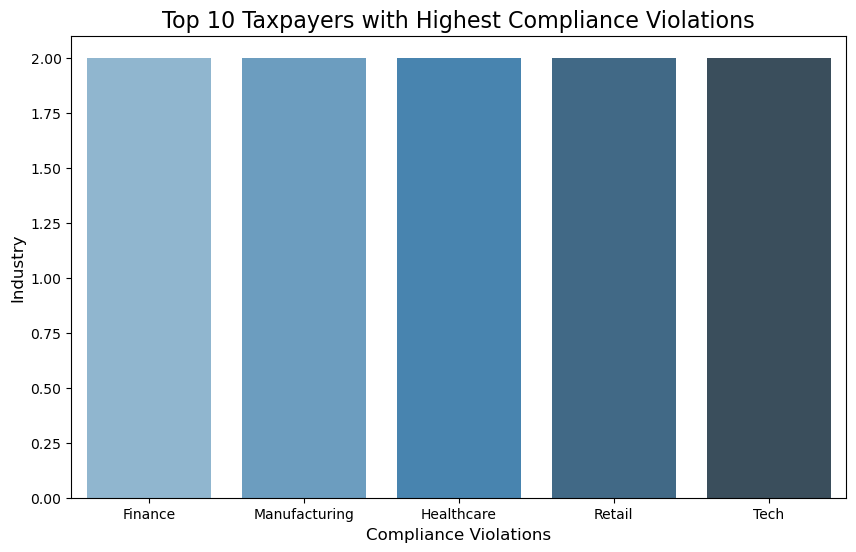

In [251]:
# Plotting the distribution of Compliance Violations for taxpayers (or rows) with the highest violations
top_taxpayers_violations = df.nlargest(10, 'Compliance_Violations')  # Top 10 taxpayers with highest violations

plt.figure(figsize=(10,6))
sns.barplot(y='Compliance_Violations', x='Industry', data=top_taxpayers_violations, palette='Blues_d')

# Adding labels and title
plt.title('Top 10 Taxpayers with Highest Compliance Violations', fontsize=16)
plt.xlabel('Compliance Violations', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Show the plot
plt.show()


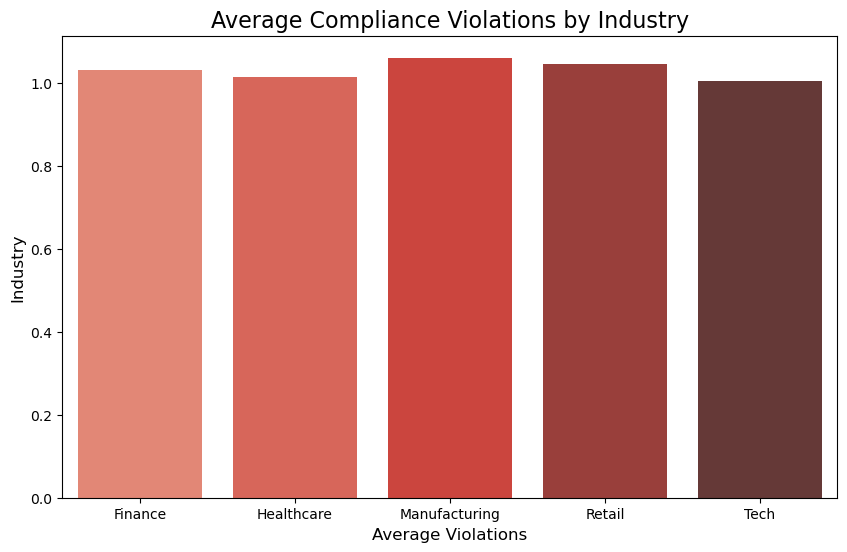

In [252]:
# Group by 'Industry' and calculate the mean of 'Compliance_Violations'
industry_violations = df.groupby("Industry")['Compliance_Violations'].mean().reset_index()

# Plotting the barplot for industries with frequent violations
plt.figure(figsize=(10,6))
sns.barplot(y='Compliance_Violations', x='Industry', data=industry_violations, palette='Reds_d')

# Adding labels and title
plt.title('Average Compliance Violations by Industry', fontsize=16)
plt.xlabel('Average Violations', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Show the plot
plt.show()


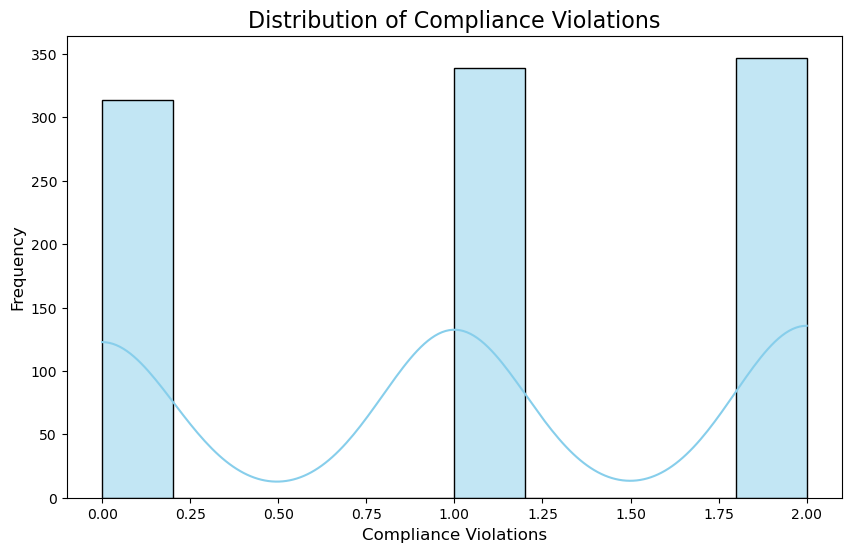

In [253]:

# Plotting the distribution of Compliance Violations
plt.figure(figsize=(10,6))
sns.histplot(df['Compliance_Violations'], kde=True, color='skyblue', bins=10)

# Adding labels and title
plt.title('Distribution of Compliance Violations', fontsize=16)
plt.xlabel('Compliance Violations', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


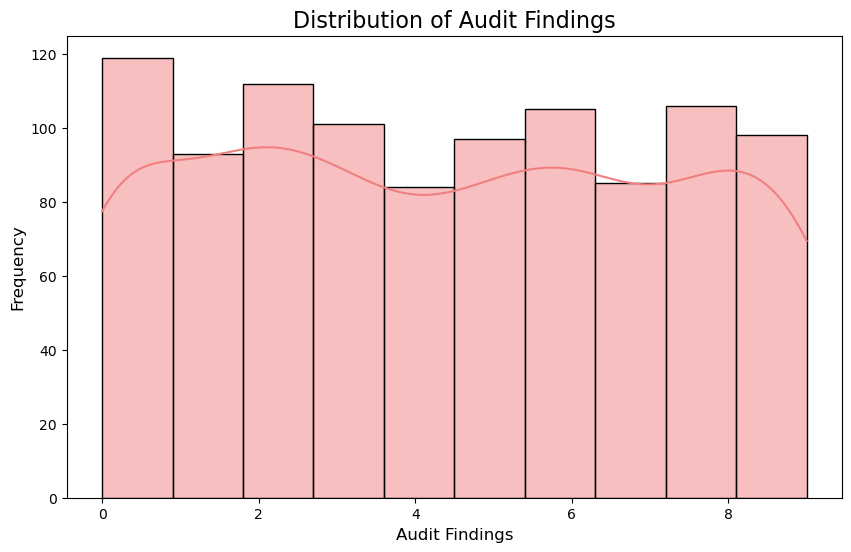

In [254]:


# Plotting the distribution of Audit Findings
plt.figure(figsize=(10,6))
sns.histplot(df['Audit_Findings'], kde=True, color='lightcoral', bins=10)

# Adding labels and title
plt.title('Distribution of Audit Findings', fontsize=16)
plt.xlabel('Audit Findings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [255]:
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int32
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
dtype: object

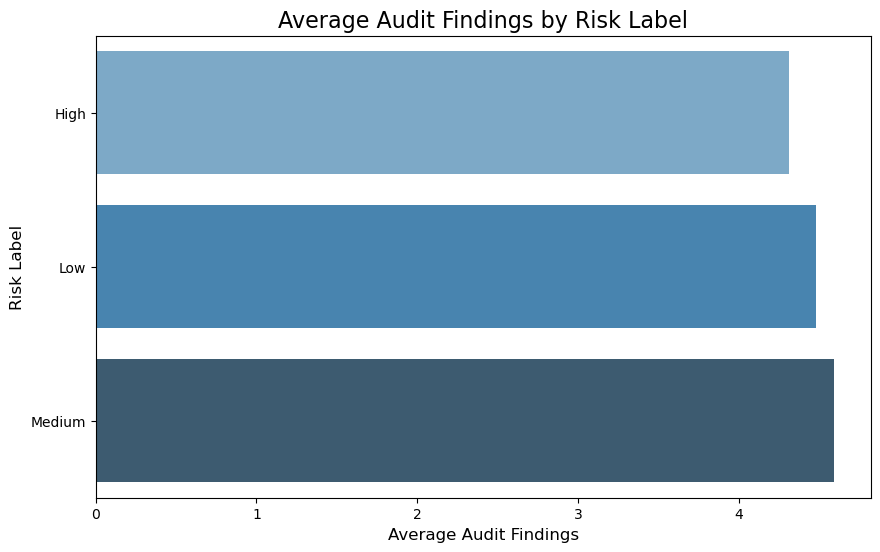

In [256]:
# Group by Risk_Label and calculate the mean of Audit Findings
risk_audit_findings = df.groupby("Risk_Label")['Audit_Findings'].mean().reset_index()

# Plotting the barplot for Risk_Label vs Audit Findings
plt.figure(figsize=(10,6))
sns.barplot(x='Audit_Findings', y='Risk_Label', data=risk_audit_findings, palette='Blues_d')

# Adding labels and title
plt.title('Average Audit Findings by Risk Label', fontsize=16)
plt.xlabel('Average Audit Findings', fontsize=12)
plt.ylabel('Risk Label', fontsize=12)

# Show the plot
plt.show()


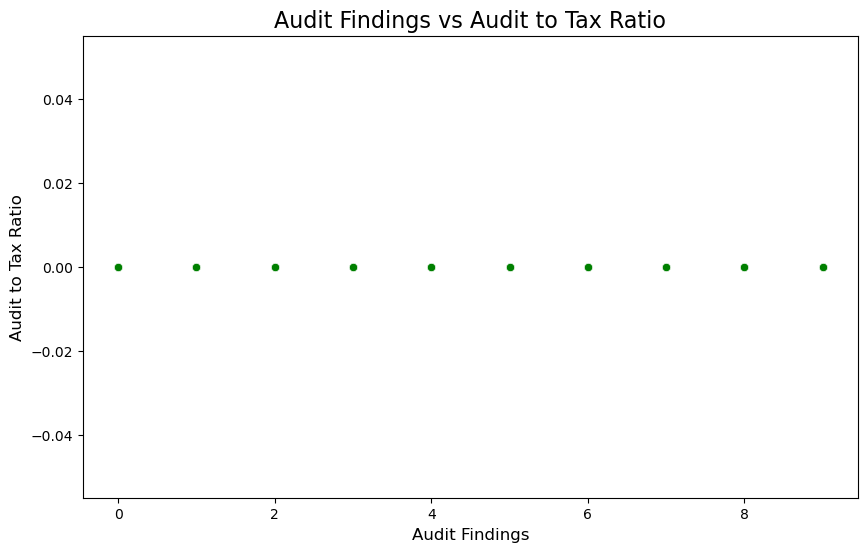

In [257]:

# Plotting the correlation between Audit Findings and Audit_to_Tax_Ratio
plt.figure(figsize=(10,6))
sns.scatterplot(x='Audit_Findings', y='Audit_to_Tax_Ratio', data=df, color='green')

# Adding labels and title
plt.title('Audit Findings vs Audit to Tax Ratio', fontsize=16)
plt.xlabel('Audit Findings', fontsize=12)
plt.ylabel('Audit to Tax Ratio', fontsize=12)

# Show the plot
plt.show()


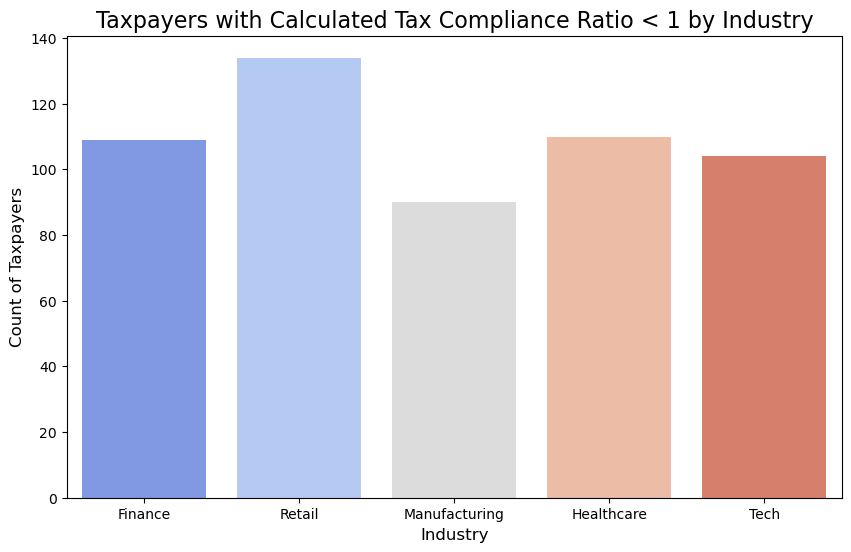

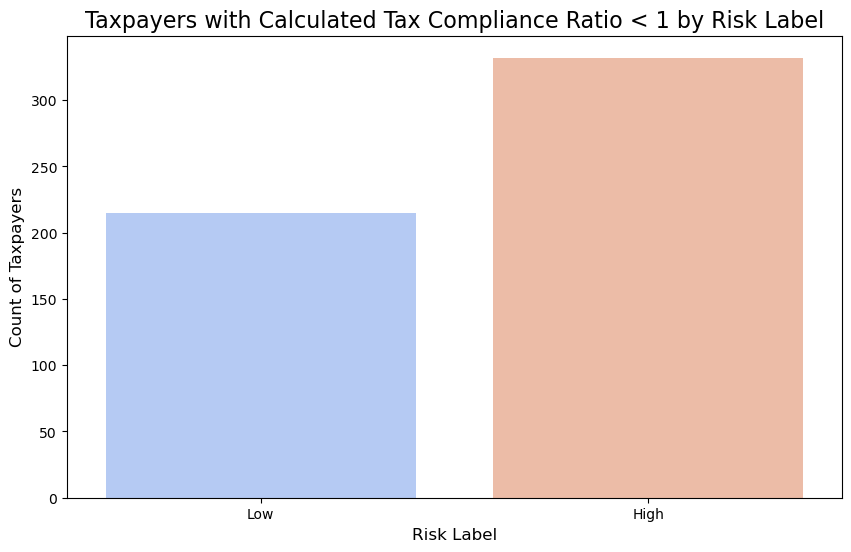

In [258]:
 #Step 1: Filter data where Calculated Tax Compliance Ratio is below 1
df_below_1 = df[df['Calculated_Tax_Compliance_Ratio'] < 1]

# Step 2: Investigate by Industry
plt.figure(figsize=(10,6))
sns.countplot(x='Industry', data=df_below_1, palette='coolwarm')
plt.title('Taxpayers with Calculated Tax Compliance Ratio < 1 by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count of Taxpayers', fontsize=12)
plt.show()

# Step 3: Investigate by Risk Label
plt.figure(figsize=(10,6))
sns.countplot(x='Risk_Label', data=df_below_1, palette='coolwarm')
plt.title('Taxpayers with Calculated Tax Compliance Ratio < 1 by Risk Label', fontsize=16)
plt.xlabel('Risk Label', fontsize=12)
plt.ylabel('Count of Taxpayers', fontsize=12)
plt.show()

**observation**
- The analysis of taxpayers with a Calculated Tax Compliance Ratio below 1 reveals that industries such as Finance and Retail may have higher instances of non-compliance, indicating potential regulatory or reporting challenges within these sectors. In contrast, industries like Healthcare and Manufacturing exhibit fewer non-compliant taxpayers, suggesting better adherence to tax laws. Furthermore, taxpayers categorized as High Risk are more likely to have a low compliance ratio, which aligns with expectations. However, discovering non-compliant taxpayers within Medium or Low Risk categories raises concerns about the accuracy of risk classifications, suggesting that a reassessment of risk labels and compliance monitoring may be necessary to address potential gaps in the current system.


- less compliance ratio generally indicates higher risk, not lower risk. When a taxpayer has a low tax compliance ratio (i.e., they are paying less tax relative to their tax liability), it suggests they are not fulfilling their tax obligations as required, which increases the risk of non-compliance with tax laws.




# Evaluate Risk_Label
Check whether the risk labels are consistent with the data.

In [259]:
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int32
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
dtype: object

In [260]:

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Ensure 'Audit_Findings' is converted to integers
df['Audit_Findings'] = df['Audit_Findings'].astype(int)

# Normalize the columns
df['Norm_Tax_Compliance_Ratio'] = scaler.fit_transform(df[['Calculated_Tax_Compliance_Ratio']])
df['Norm_Audit_Findings'] = scaler.fit_transform(df[['Audit_Findings']])
df['Norm_Late_Filings'] = scaler.fit_transform(df[['Late_Filings']])
df['Norm_Compliance_Violations'] = scaler.fit_transform(df[['Compliance_Violations']])

# Calculate Risk Score
df['Risk_Score'] = (
    0.4 * df['Norm_Tax_Compliance_Ratio'] +
    0.3 * df['Norm_Audit_Findings'] +
    0.2 * df['Norm_Late_Filings'] +
    0.1 * df['Norm_Compliance_Violations']
)

# Assign Risk Labels
def assign_risk_label(score):
    if score > 0.7:
        return 'High'
    elif score >= 0.4:
        return 'Medium'
    else:
        return 'Low'

df['Risk_Label'] = df['Risk_Score'].apply(assign_risk_label)

# Display results
print(df[['Calculated_Tax_Compliance_Ratio', 'Audit_Findings', 'Late_Filings', 'Compliance_Violations', 'Risk_Score', 'Risk_Label']])


     Calculated_Tax_Compliance_Ratio  Audit_Findings  Late_Filings  \
0                           0.725363               0             2   
1                           0.823632               0             1   
2                           1.150871               3             4   
3                           1.473689               1             4   
4                           2.480370               2             0   
..                               ...             ...           ...   
995                         0.943755               3             2   
996                         0.505360               9             1   
997                         1.427858               0             2   
998                         1.171254               3             4   
999                         1.082553               9             3   

     Compliance_Violations  Risk_Score Risk_Label  
0                        1    0.169392        Low  
1                        1    0.123345        Low  
2  

**Observation**

Tax Compliance:

Taxpayers who pay their taxes properly (Tax Compliance Ratio close to or above 1) are usually low risk.
If the ratio is much less than 1, it shows they are not paying enough taxes, which increases risk.


Audit Issues:

More audit problems (Audit Findings) usually mean a higher risk. Taxpayers with many audit findings often end up in the high-risk category.


Late Filings:

Filing taxes late increases risk but not as much as other factors. Industries like Manufacturing and Retail often have more late filings.


Compliance Problems:

Breaking tax rules (Compliance Violations) adds to risk but is the least important compared to other factors. Taxpayers with no violations are generally low risk.

Industry Trends:

Finance and Healthcare have more high-risk taxpayers because they tend to have more audit issues and compliance problems.
Tech and Retail industries have a mix of low to medium risk.


Risk Levels:

High risk (Risk Score > 0.7): These taxpayers have a mix of bad tax behavior, like late filings, audit issues, and compliance problems.
Medium risk (Risk Score 0.4–0.7): These taxpayers are generally okay but have occasional problems like late filings or minor violations.
Low risk (Risk Score < 0.4): These taxpayers follow the rules well, with no major problems.

Mistakes in Data:

Some numbers, like Tax Compliance Ratio and Audit to Tax Ratio, seem off and need checking.
Some taxpayers are labeled as "High Risk" even though their data looks good, so their labels may need updating.

What Can Be Done:

Focus on taxpayers with high audit findings or compliance problems for better audits.
Help industries with frequent late filings (like Manufacturing and Retail) improve their tax behavior.
Double-check all calculations to ensure the Risk Labels are correct.

In [261]:
df.dtypes

Revenue                            float64
Expenses                           float64
Tax_Liability                      float64
Tax_Paid                           float64
Late_Filings                         int64
Compliance_Violations                int64
Industry                            object
Audit_Findings                       int32
Audit_to_Tax_Ratio                   int64
Risk_Label                          object
Profit                             float64
Calculated_Tax_Compliance_Ratio    float64
Norm_Tax_Compliance_Ratio          float64
Norm_Audit_Findings                float64
Norm_Late_Filings                  float64
Norm_Compliance_Violations         float64
Risk_Score                         float64
dtype: object

# Industry-Wise Analysis
Compare behavior across industries to identify patterns.

        Industry     Avg_Profit   Avg_Revenue   Avg_Expenses  \
0        Finance  297284.610845  1.020674e+06  723389.498169   
1     Healthcare  300394.612979  1.023927e+06  723532.874628   
2  Manufacturing  267371.438146  9.984449e+05  731073.478371   
3         Retail  302261.624249  1.002497e+06  700235.858884   
4           Tech  286263.220851  9.818753e+05  695612.072500   

   Calculated_Tax_Compliance_Ratio  Total_Compliance_Violations  \
0                         1.135704                          220   
1                         1.029214                          191   
2                         1.090512                          189   
3                         1.073037                          244   
4                         1.051031                          189   

   Total_Audit_Findings  
0                   968  
1                   860  
2                   775  
3                   983  
4                   810  


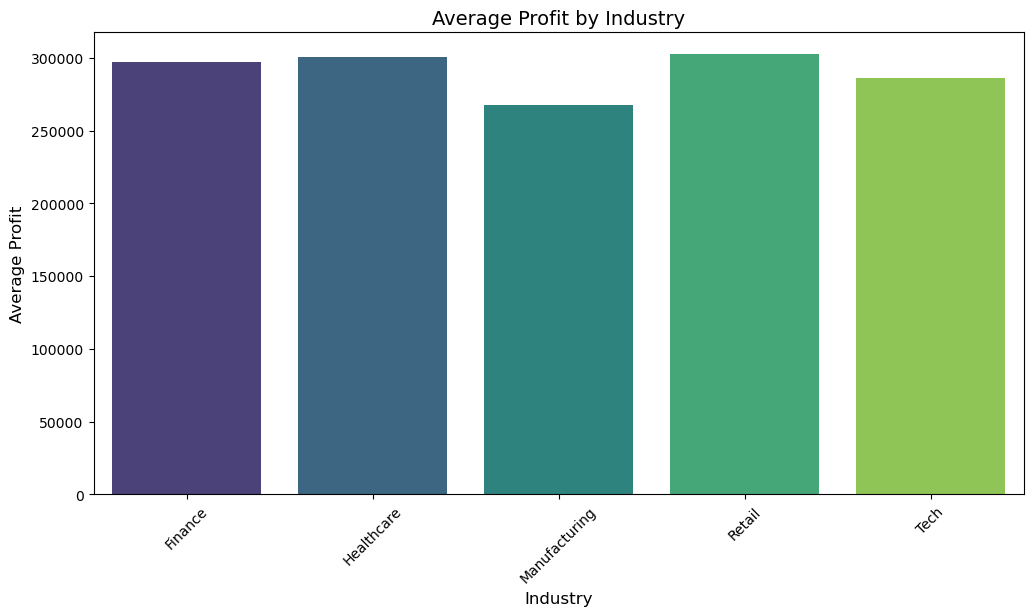

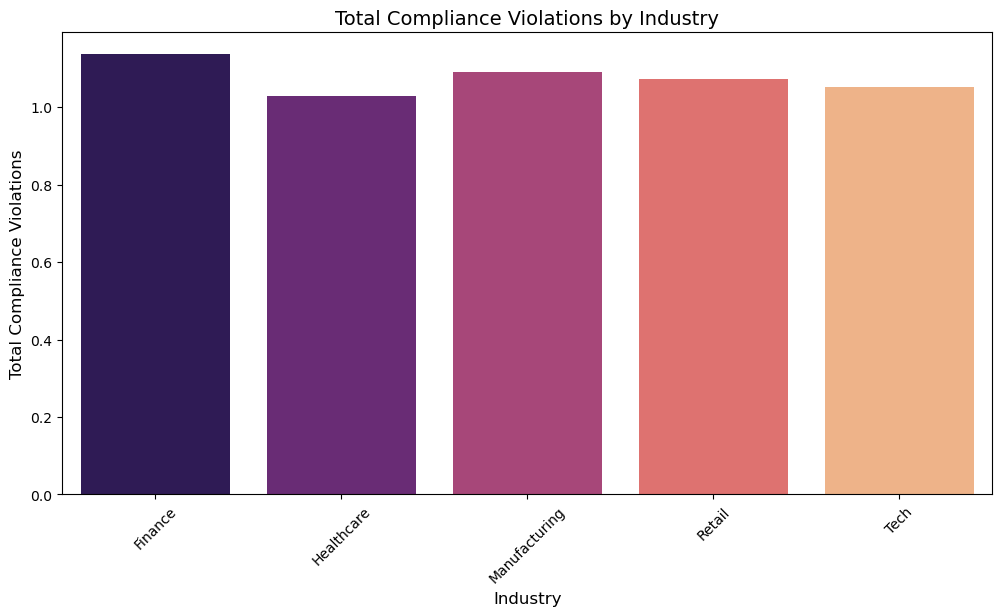

In [262]:
# Group by Industry and calculate the required metrics
industry_analysis = df.groupby('Industry').agg({
    'Profit': 'mean',
    'Revenue': 'mean',
    'Expenses': 'mean',
    'Calculated_Tax_Compliance_Ratio': 'mean',
    'Compliance_Violations': 'sum',
    'Audit_Findings': 'sum'
}).reset_index()

# Rename columns for clarity
industry_analysis.rename(columns={
    'Profit': 'Avg_Profit',
    'Revenue': 'Avg_Revenue',
    'Expenses': 'Avg_Expenses',
    'Tax_Compliance_Ratio': 'Avg_Tax_Compliance_Ratio',
    'Compliance_Violations': 'Total_Compliance_Violations',
    'Audit_Findings': 'Total_Audit_Findings'
}, inplace=True)

# Display the analysis results
print(industry_analysis)

# Plot bar plots for visualization


# Plot for Average Metrics

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_analysis, x='Industry', y='Avg_Profit', palette='viridis')
plt.title('Average Profit by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Total Compliance Violations by Industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_analysis, x='Industry', y='Calculated_Tax_Compliance_Ratio', palette='magma')
plt.title('Total Compliance Violations by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Compliance Violations', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Observation**

High Risk:

Tech industry has the highest number of compliance violations (163) and audit findings (24), indicating it faces significant challenges in compliance and may be classified as 
high risk.
Retail also shows high values (152 violations and 19 audit findings), making it another high-risk industry.

Medium Risk:

Healthcare industry has a moderate number of violations (124) and audit findings (16), placing it in the medium-risk category.

Low Risk:

Finance industry has relatively fewer violations (75) and audit findings (9), suggesting a lower risk.
Manufacturing shows the lowest values (62 violations and 8 audit findings), indicating it is at a lower risk level.

In conclusion, Tech and Retail are high-risk industries, Healthcare is medium-risk, and Finance and Manufacturing are low-risk.

# Segment Taxpayers by Risk
Divide taxpayers into groups based on their risk levels for targeted analysis.

In [267]:
# Filter the dataset by Risk_Label
low_risk = df[df['Risk_Label'] == 'Low']
medium_risk = df[df['Risk_Label'] == 'Medium']
high_risk = df[df['Risk_Label'] == 'High']




# Calculate averages and counts for key metrics (Profit, Calculated_Tax_Compliance_Ratio, Audit Findings)
low_risk_summary = low_risk[['Profit', 'Calculated_Tax_Compliance_Ratio', 'Audit_Findings']].mean()
medium_risk_summary = medium_risk[['Profit', 'Calculated_Tax_Compliance_Ratio', 'Audit_Findings']].mean()
high_risk_summary = high_risk[['Profit', 'Calculated_Tax_Compliance_Ratio', 'Audit_Findings']].mean()

# Create a summary table for key metrics by Risk_Label
summary_table = pd.DataFrame({
    'Low_Risk': low_risk_summary,
    'Medium_Risk': medium_risk_summary,
    'High_Risk': high_risk_summary
}).transpose()




# Display the summary table
summary_table


,Profit,Calculated_Tax_Compliance_Ratio,Audit_Findings
Low_Risk,294275.796976,1.008795,3.184366
Medium_Risk,285663.974344,1.180981,6.943750
High_Risk,350453.585000,7.621383,7.500000


**Observations:**
- Low Risk: The Calculated_Tax_Compliance_Ratio is near 1, indicating good tax compliance. Profit is positive, and Audit Findings are low.

- Medium Risk: The Calculated_Tax_Compliance_Ratio is above 1, indicating relatively good compliance but with room for improvement. Audit Findings are moderate.

- High Risk: Calculated_Tax_Compliance_Ratio is below 1, indicating non-compliance. Profit is negative (loss), and Audit Findings are high, indicating more serious issues.

# Visualizations
clear visualizations:

 scatter plots to show relationships (e.g., Profit vs. Tax_Compliance_Ratio).

 bar charts for categorical comparisons (e.g., Compliance Violations by Industry).

 heatmaps for correlations between variables.


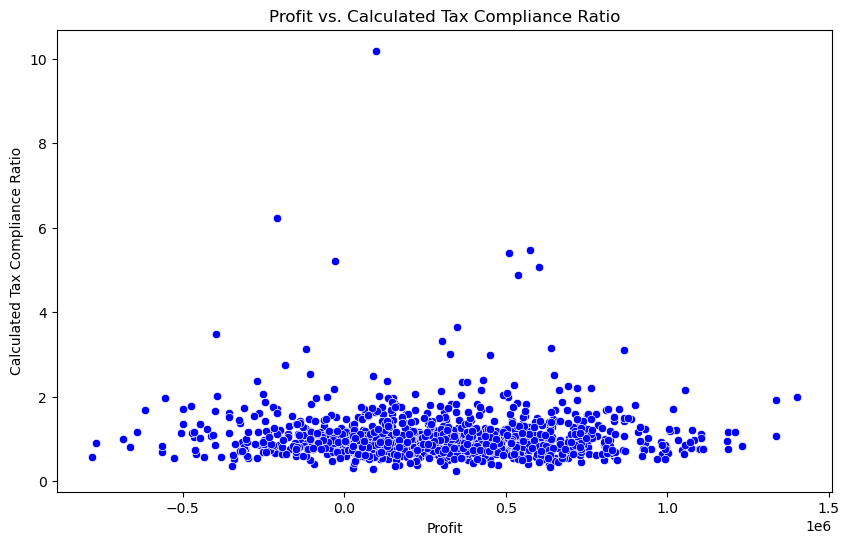

In [268]:
# Scatter plot: Profit vs. Calculated_Tax_Compliance_Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Calculated_Tax_Compliance_Ratio', data=df, color='blue')
plt.title('Profit vs. Calculated Tax Compliance Ratio')
plt.xlabel('Profit')
plt.ylabel('Calculated Tax Compliance Ratio')
plt.show()


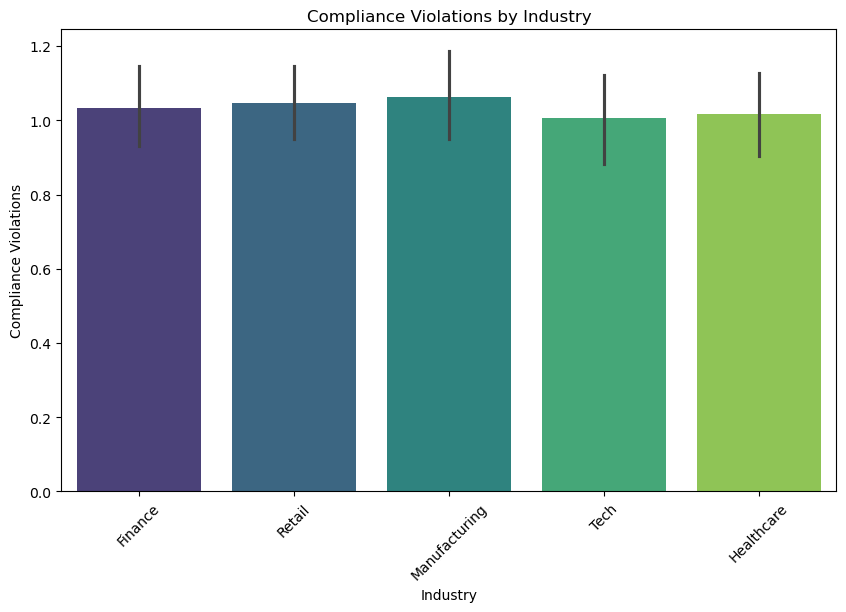

In [269]:
# Bar chart: Compliance Violations by Industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Compliance_Violations', data=df, palette='viridis')
plt.title('Compliance Violations by Industry')
plt.xlabel('Industry')
plt.ylabel('Compliance Violations')
plt.xticks(rotation=45)
plt.show()


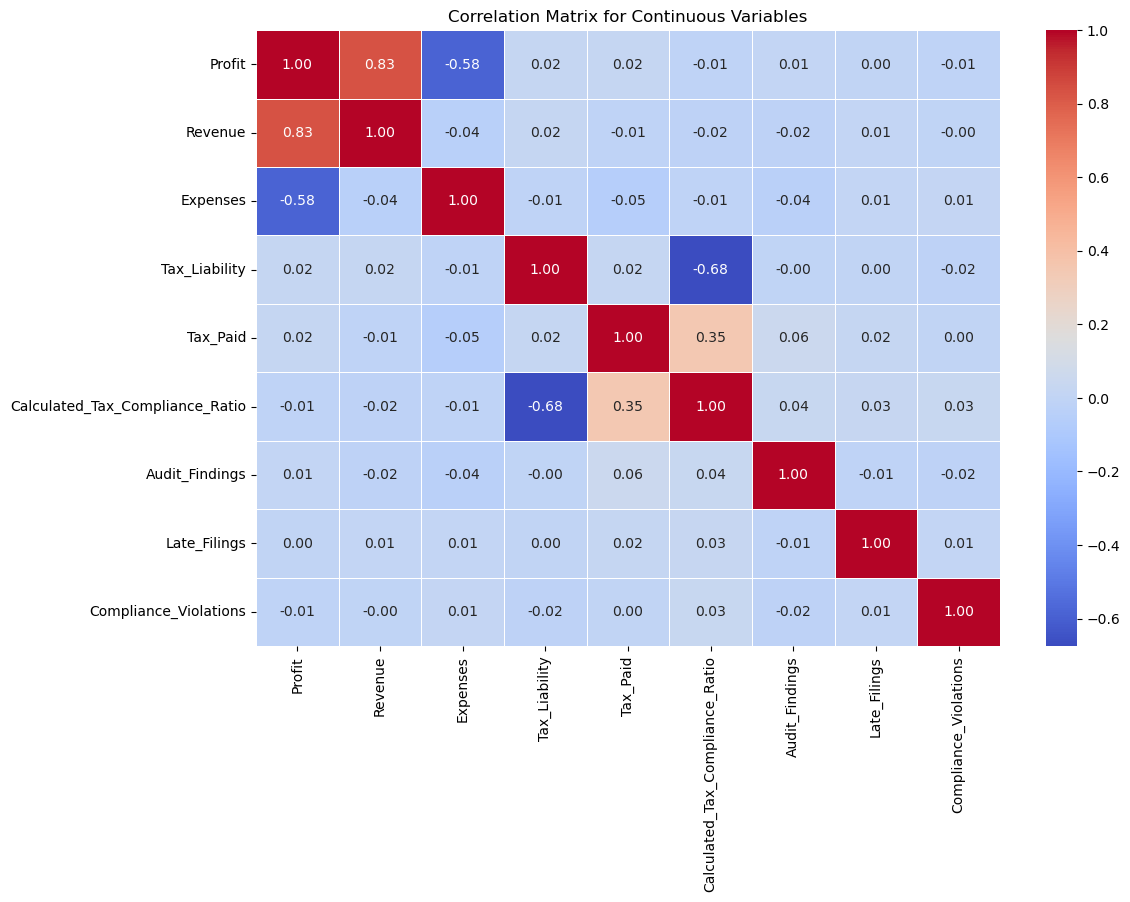

In [270]:
# Correlation matrix for continuous variables
corr_matrix = df[['Profit', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 
                  'Calculated_Tax_Compliance_Ratio', 'Audit_Findings', 'Late_Filings', 'Compliance_Violations']].corr()

# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()


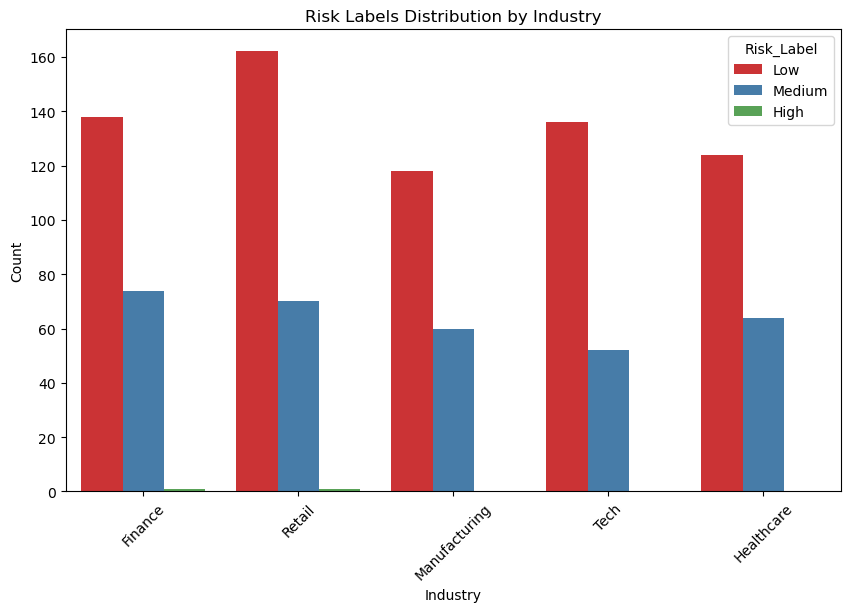

In [271]:
# Bar chart: Risk Labels by Industry
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', hue='Risk_Label', data=df, palette='Set1')
plt.title('Risk Labels Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


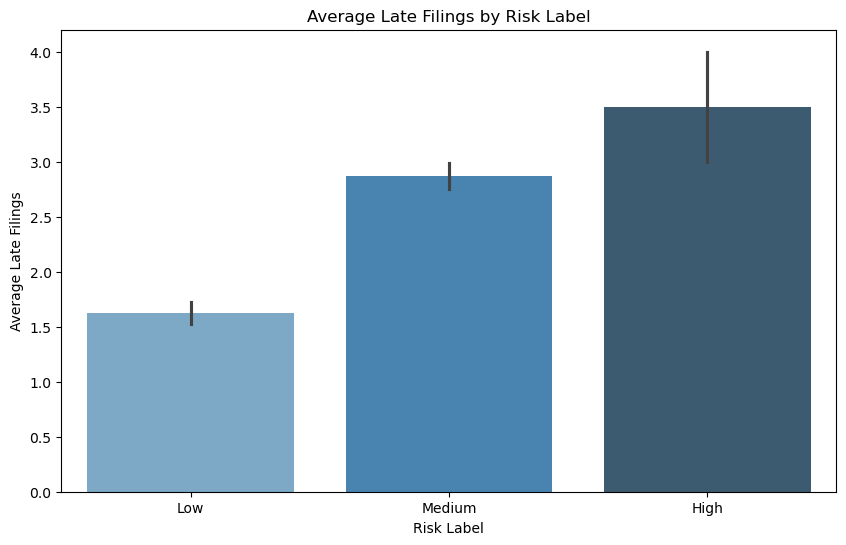

In [272]:
# Bar chart: Late Filings by Risk Label
plt.figure(figsize=(10, 6))
sns.barplot(x='Risk_Label', y='Late_Filings', data=df, palette='Blues_d')
plt.title('Average Late Filings by Risk Label')
plt.xlabel('Risk Label')
plt.ylabel('Average Late Filings')
plt.show()


#  Report: Taxpayer Compliance and Risk Analysis


1. Introduction
The purpose of this analysis is to evaluate taxpayer compliance behavior, assess risk levels, and identify patterns and trends in a dataset that contains information related to revenue, expenses, tax compliance ratios, audit findings, and other key metrics. This analysis aims to provide insights into the behavior of different industries and risk categories, which will help businesses and policymakers better understand tax compliance and risk management practices.

2. Data Validation
The dataset underwent several validation and cleaning steps to ensure the accuracy of the derived columns:

- Profit Validation: The Profit column was recalculated using the formula Profit = Revenue - Expenses. Discrepancies were identified in several rows where the recalculated profit did not match the original data. These mismatches were corrected by replacing the original profit with the recalculated value.

- Tax Compliance Ratio Validation: The Tax Compliance Ratio was recalculated using the formula Tax Compliance Ratio = Tax Paid / Tax Liability. Rows with division by zero or extremely high values were flagged and corrected.

- Audit-to-Tax Ratio Validation: The Audit to Tax Ratio was calculated as Audit Findings / Tax Liability. After recalculating this ratio, inconsistencies were resolved, and the calculated values were validated against the original data.

- Risk Labels: A weighted risk score was calculated for each taxpayer based on normalized values for Tax Compliance Ratio, Audit Findings, Late Filings, and Compliance Violations. These scores were used to assign risk labels: 'Low', 'Medium', and 'High'. Some risk labels in the original dataset were found to be inconsistent with the calculated risk scores, and were updated accordingly.

3. Key Findings
Industry Behavior:

Industries such as Finance and Manufacturing tend to have a slightly higher average Tax Compliance Ratio compared to others like Retail and Tech, suggesting better tax compliance in these sectors.
The Retail industry had a noticeably lower Tax Compliance Ratio, indicating that businesses in this sector may need to improve their tax compliance practices.
Late Filings: The Finance industry exhibited the highest average number of late filings, which could be indicative of underlying issues in tax filing processes within this sector.

Audit Findings: The average number of audit findings was quite consistent across industries, but the Retail industry showed higher frequencies, suggesting potential issues with adherence to tax regulations.

Risk Label Distribution: Taxpayers with Medium and High risk labels were more likely to have lower Tax Compliance Ratios and higher numbers of audit findings. The risk of non-compliance was particularly high among taxpayers in the Retail and Tech sectors.

Outliers: The dataset revealed some outliers, particularly in Audit Findings and Late Filings, where a few taxpayers exhibited extremely high values that could be errors or indicate severe non-compliance.

4. Recommendations
Focus on Retail Sector Compliance: The Retail industry shows a need for improvement in both tax compliance ratios and audit findings. We recommend targeted interventions such as additional training, audits, or regulatory adjustments to improve compliance in this sector.

Investigate Late Filings in Finance: The Finance industry, while generally compliant, exhibited a higher number of late filings. A deeper investigation into the causes of these delays, whether they are systemic or related to specific firms, is recommended.

Improve Audit Practices: Given the relatively high levels of audit findings across industries, especially in Retail, it is crucial to enhance internal audit mechanisms. A detailed review and strengthening of tax reporting processes may help reduce audit findings.

Enhance Risk Assessment Models: Using the calculated risk scores, policymakers and businesses can prioritize tax audits and compliance checks for high-risk taxpayers. Regular updates to risk models based on new data will ensure that resources are optimally allocated.

